In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Niklas
[nltk_data]     Kothe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [81]:
# Load the data
data = pd.read_csv("data/ryanair_reviews.csv")
comments = data[["Comment title", "Comment"]]
comments.head()

,Comment title,Comment
0,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...
1,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...
2,“Really impressed!”,"Really impressed! You get what you pay for, th..."
3,“a decent offering from Ryanair”,I should like to review my flight from Faro to...
4,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w..."


**Preprocessing: (Optional)**
No preprocessing is necessary as it is done by VADER.

Source: [An Introduction to VADER](https://towardsdatascience.com/an-short-introduction-to-vader-3f3860208d53)

Other sources:
- [British Airways Sentiment Analysis Notebook](https://github.com/Horace-code/British-Airways-Sentiment-Analysis/blob/main/British_Airways_Sentiment_Analysis.ipynb)
- [Sentiment Analysis using VADER](https://akladyous.medium.com/sentiment-analysis-using-vader-c56bcffe6f24)


In [64]:
# Function for lowercasing the text
def to_lower(text):
    return text.lower()

# Function for removing punctuation and extra white spaces
def remove_punctuation(text):
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra white spaces
    punc = '!()-[]{};:"\,<>./?@#$%^&*_~'
    # Use a list comprehension to create a new string without punctuation
    no_punc = ''.join(char for char in text if char not in punc)
    return no_punc

# Function to tokenize the text
def tokenize(text):
    return word_tokenize(text)

# Function to remove small words
def short_word_removal(tokens):
    return [word for word in tokens if len(word) >= 2]

# Function to remove stopwords and non-alphabetic tokens
def remove_stopwords_and_non_alphabetic_tokens(tokens):
    # Remove the stopwords and non-alphabetic tokens
    stopwords = nltk.corpus.stopwords.words('english')
    no_stop = [word for word in tokens if word not in stopwords and word.isalpha()]
    return ' '.join(no_stop)

In [82]:
# Preprocess the comments
comments["cleaned_Comment"] = comments["Comment"].apply(lambda x: to_lower(x))
comments["cleaned_Comment"] = comments["cleaned_Comment"].apply(lambda x: remove_punctuation(x))
comments["cleaned_Comment"] = comments["cleaned_Comment"].apply(lambda x: tokenize(x))
comments["cleaned_Comment"] = comments["cleaned_Comment"].apply(lambda x: short_word_removal(x))
comments["cleaned_Comment"] = comments["cleaned_Comment"].apply(lambda x: remove_stopwords_and_non_alphabetic_tokens(x))

In [88]:
sia = SentimentIntensityAnalyzer()
sia_cleaned = SentimentIntensityAnalyzer()

In [89]:
# Add sentiment scores to the data frame
comments["score"] = comments["Comment"].apply(lambda x: sia.polarity_scores(x))
comments['negative'] = comments['score'].apply(lambda x: x['neg'])
comments['neutral'] = comments['score'].apply(lambda x: x['neu'])
comments['positive'] = comments['score'].apply(lambda x: x['pos'])
comments['compound'] = comments['score'].apply(lambda x: x['compound'])

comments["score_cleaned"] = comments["cleaned_Comment"].apply(lambda x: sia_cleaned.polarity_scores(x))
comments['negative_cleaned'] = comments['score_cleaned'].apply(lambda x: x['neg'])
comments['neutral_cleaned'] = comments['score_cleaned'].apply(lambda x: x['neu'])
comments['positive_cleaned'] = comments['score_cleaned'].apply(lambda x: x['pos'])
comments['compound_cleaned'] = comments['score_cleaned'].apply(lambda x: x['compound'])

comments.drop(columns=["score"], inplace=True)
comments.drop(columns=["score_cleaned"], inplace=True)

In [90]:
# Define the function for the emotion (positive, negative, neutral)
def final_sentiment(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [91]:
comments["sentiment"] = comments["compound"].apply(lambda compound : final_sentiment(compound))

comments["sentiment_cleaned"] = comments["compound_cleaned"].apply(lambda compound : final_sentiment(compound))

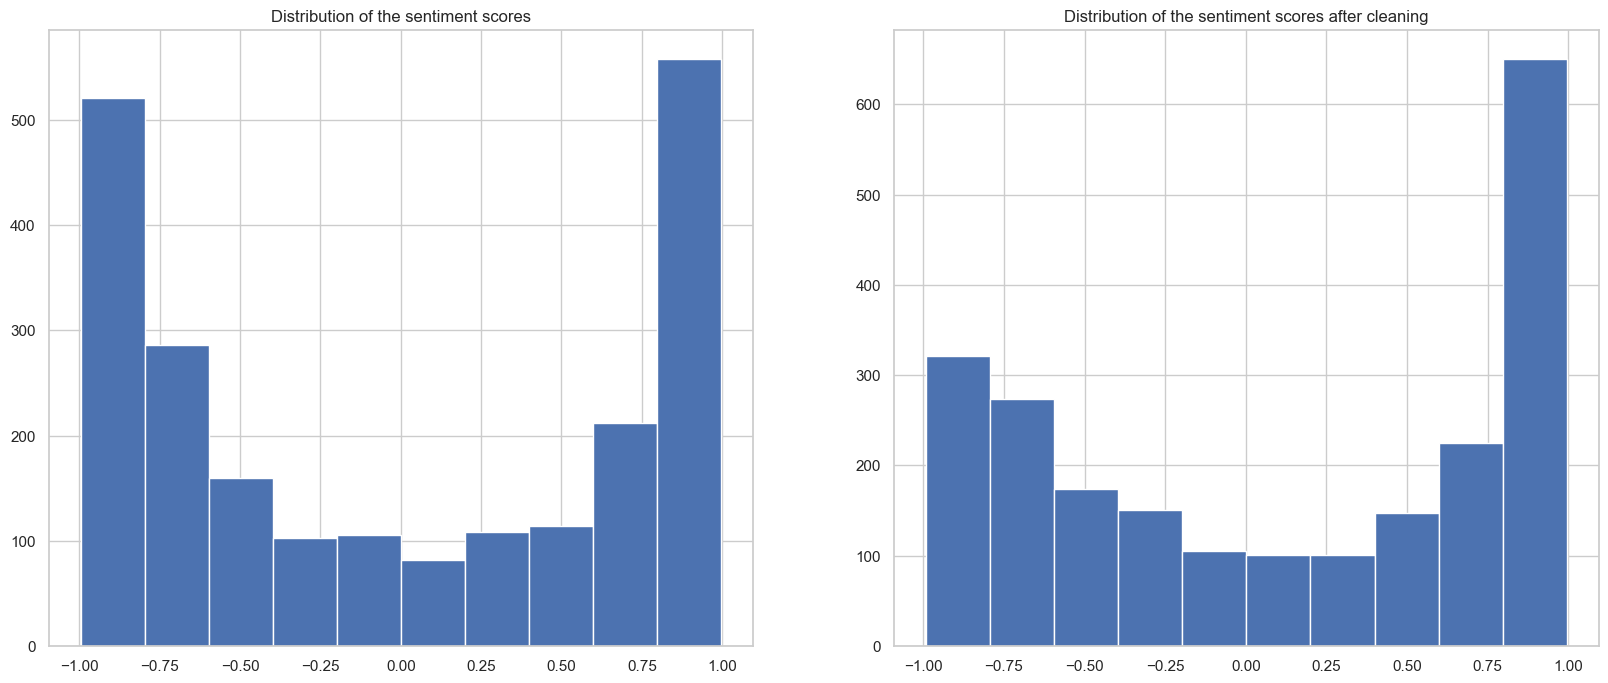

In [92]:

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first plot
axs[0].hist(comments['compound'])
axs[0].set_title("Distribution of the sentiment scores")

# Plot the second plot
axs[1].hist(comments['compound_cleaned'])
axs[1].set_title("Distribution of the sentiment scores after cleaning")

# Show the combined plot
plt.show()

As we can see, most ratings are either positive or negative!

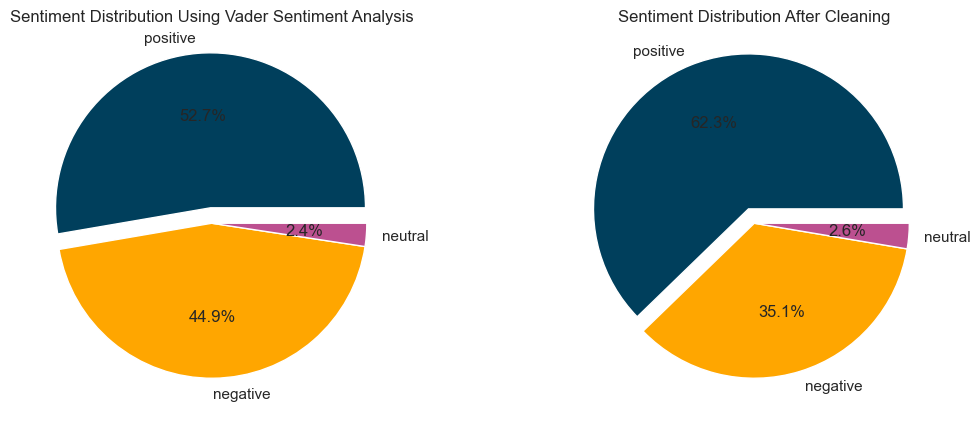

In [95]:
# Generate a pie chart to visualize the distribution of sentiment_proportions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(
    sentiment_proportions,
    labels=sentiment_proportions.index,
    colors=['#003f5c', '#ffa600', '#bc5090'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
)
axs[0].set_title("Sentiment Distribution Using Vader Sentiment Analysis")

# Plot the second pie chart
axs[1].pie(
    sentiment_proportions_cleaned,
    labels=sentiment_proportions_cleaned.index,
    colors=['#003f5c', '#ffa600', '#bc5090'],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%'
)
axs[1].set_title("Sentiment Distribution After Cleaning")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the combined plot
plt.show()

Among a total of over 2000 reviews, approximately 52.7% exhibited a positive sentiment, around 44.9% were characterized as negative, and merely 2.4% were identified as neutral. Consequently, the prevailing trend in these reviews is one of polarization, with the majority leaning towards either a positive or negative sentiment. Though, it depends on the intervals set in the `final_sentiment(compound)` function. However, these thresfolds are common and also applied for instance in https://www.kaggle.com/code/prachi13/sentiment-analysis-vader-vs-textblob

However, the sentiments also clearly depend on the preprocessing steps. After cleaning we have a higher fraction of positive comments. In the following, we will explore 10 example where the sentiment was different.

In [115]:
# Filter the dataframe for rows where sentiment and sentiment_cleaned are different
different_sentiments = comments[comments["sentiment"] != comments["sentiment_cleaned"]]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# Access the "cleaned_Comment" and "Comment" columns for the filtered rows
difference = different_sentiments[["sentiment","Comment","sentiment_cleaned", "cleaned_Comment"]]
difference.head(10)


,sentiment,Comment,sentiment_cleaned,cleaned_Comment
5,negative,"Booked a fight from Copenhagen to Poland though booking.com Somewhere in the email from booking.com it states that checkin must be done online from home. I figure I'll do it in the morning since I have plenty of time. it's low season and I don't have any checked in luggage. I live in Copenhagen not far from the airport. Morning comes and I try to check in online. No luck, apparently they close online checkin 3 hours before the flight. I figure I'll just check in at the airport at those self serve terminals. I arrive at the airport 2 hours before my flight and head for a terminal. Prompt says: kindly go to service desk. Head for service desk. They charge me 42 euro to check me in. The flight itself was 57 euro. They almost charged me the price of the flight just to check me in manually! And they forced me to check in manually by closing online and self-serve checkin. This is Ryanair policy. Apparently. Wizzair and booking are not without blame either, as they decide who they want to do business with.",positive,booked fight copenhagen poland though bookingcom somewhere email bookingcom states checkin must done online home figure morning since plenty time low season checked luggage live copenhagen far airport morning comes try check online luck apparently close online checkin hours flight figure check airport self serve terminals arrive airport hours flight head terminal prompt says kindly go service desk head service desk charge euro check flight euro almost charged price flight check manually forced check manually closing online selfserve checkin ryanair policy apparently wizzair booking without blame either decide want business
9,negative,"I wanted to check in online a night before our flight, but my nationality was not listed in their websites and when we wanted to check in in person they asked for a fee, and that still was not a problem! They asked for a credit card to check for late check-in fee, we asked them to pay by our debit card or by cash, but they did not accept it. So we missed our flight, and they made us pay a No show fee on the application so that they give us another flight in the evening. The flight we got was about 30 Euro and the no show fee we paid was 100 Euro. When I told them in Germany we can pay by debit card or cash, they said we are an Irish airline it has nothing to do with Germany! Then why do you have your business here? The other thing is when I mentioned my nationality was not listed on your website they did not accept that and they inserted my nationality manually!",positive,wanted check online night flight nationality listed websites wanted check person asked fee still problem asked credit card check late checkin fee asked pay debit card cash accept missed flight made us pay show fee application give us another flight evening flight got euro show fee paid euro told germany pay debit card cash said irish airline nothing germany business thing mentioned nationality listed website accept inserted nationality manually
12,None,At least 5 passengers denied boarding in Lisbon due to overbooking. In London Stansted the plane was 1:30 minutes late due to what seemed to be defrosting.,None,least passengers denied boarding lisbon due overbooking london stansted plane minutes late due seemed defrosting
13,negative,"This is my tenth flight with Ryanair this year - and eight of the 10 flights had delays - usually between one and two hours, but we had more than three hours too! There is basically no way anymore that you can convincingly plan longer trips with them, for example a train journey after arrival, because you never know when you arrive. Today, we are loosing another train ticket that we bought ages ago in advance, when we still believed that some delays are exceptions to the rule, rather than the new rule. Even back then, we already calculated with a one and a half hour Ryanair delay, but that is just not good enough for that ""never 

As we can see that there is some ironical touch in the ratings, which kinda screws the sentiments. In the following we will observe the polarity scores against the actual given ratings.

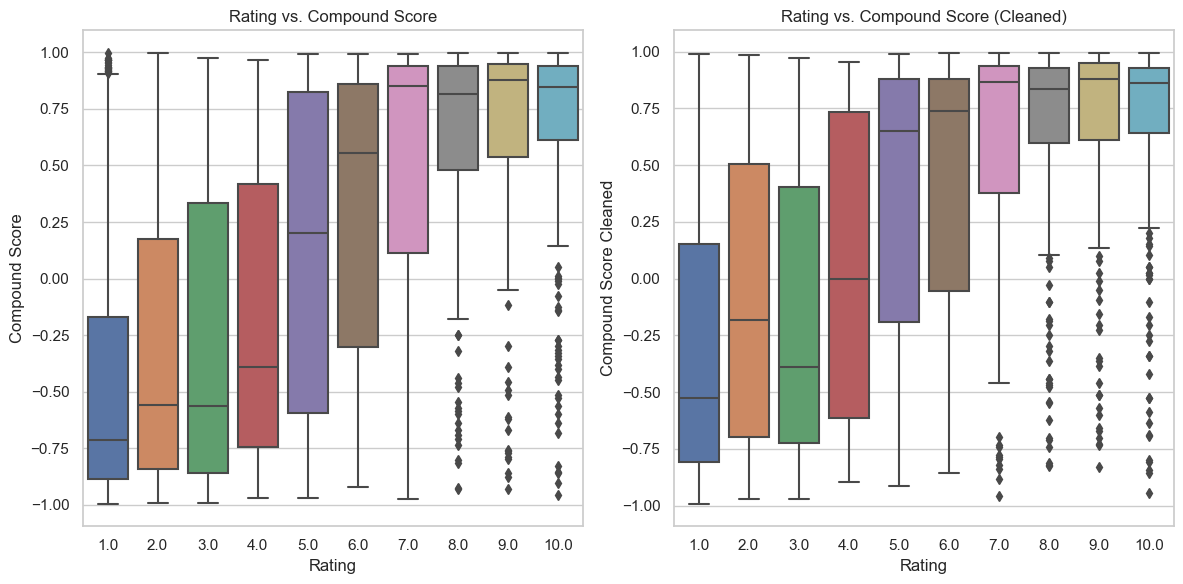

Correlation between Overall Rating and compound_cleaned: 0.5911705786046415
Correlation between Overall Rating and compound: 0.6192897825876189


In [132]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
merged = pd.concat([comments, data["Overall Rating"]], axis=1)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Rating vs. Compound Score
sns.boxplot(data=merged, x="Overall Rating", y="compound", ax=axs[0])
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Compound Score')
axs[0].set_title('Rating vs. Compound Score')

# Plot 2: Rating vs. Compound Score (Cleaned)
sns.boxplot(data=merged, x="Overall Rating", y="compound_cleaned", ax=axs[1])
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Compound Score Cleaned')
axs[1].set_title('Rating vs. Compound Score (Cleaned)')

# Show the plots
plt.tight_layout()
plt.show()

correlation = merged['Overall Rating'].corr(merged['compound_cleaned'], method='spearman')
print("Correlation between Overall Rating and compound_cleaned:", correlation)

correlation = merged['Overall Rating'].corr(merged['compound'], method='spearman')
print("Correlation between Overall Rating and compound:", correlation)

**Text Analysis and Visualisation**

In [36]:
def get_wordcloud_and_hist_of_words(column):

    # Combine all reviews into a single string
    joined_reviews = ''.join(column)
    tokenized_words = word_tokenize(joined_reviews)

    # Create a Counter to count word frequencies
    word_freq = Counter(tokenized_words)

    # Get the most common words and their frequencies
    common_words = word_freq.most_common(30)

    # Get the labels and values for the histogram
    labels, values = zip(*common_words)

    # Create the histogram
    plt.bar(labels, values)

    # Set the x-axis labels to be vertical
    plt.xticks(rotation=90)

    # Set labels
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency')
    plt.show()

    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate_from_frequencies(word_freq)

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


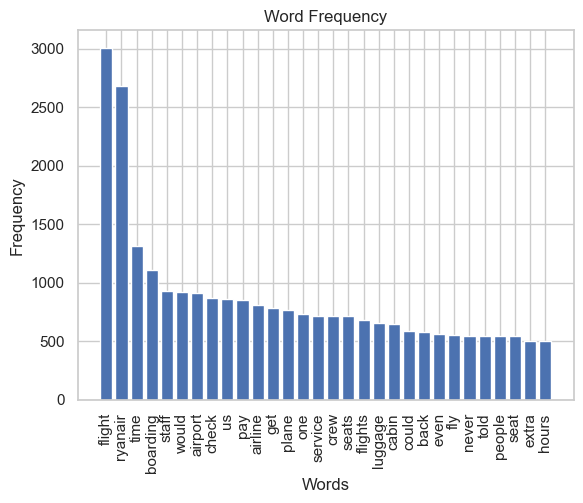

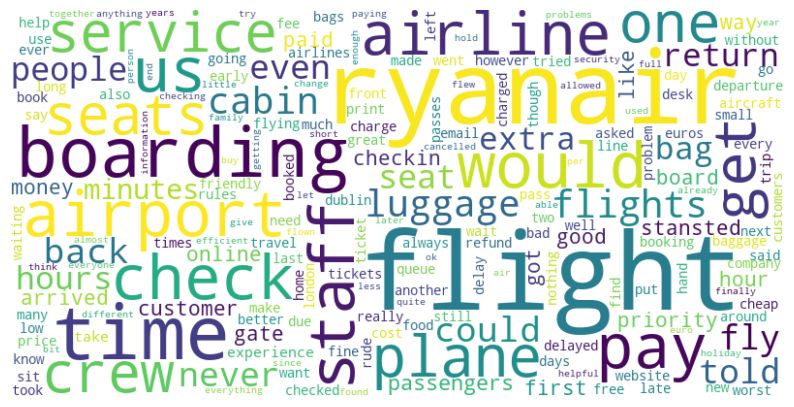

In [44]:


get_wordcloud_and_hist_of_words(comments["Comment"])